<a href="https://colab.research.google.com/github/Vlasovasona/Python-and-ML-Raschka/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D1%8B_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логистическая регрессия


---



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

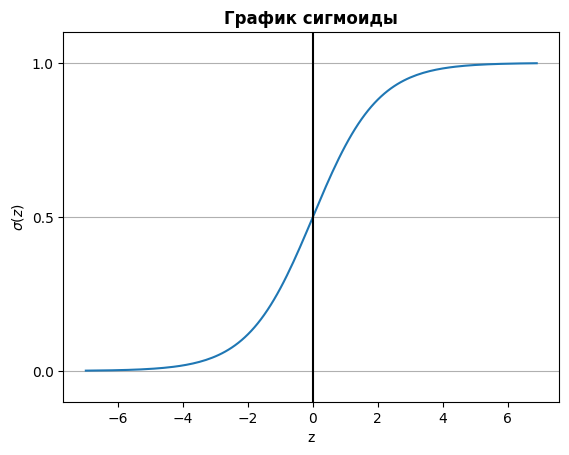

In [2]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
#  деления оси у и линии сетки
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.title(label="График сигмоиды", fontweight='bold')
plt.show()

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
  # настройка генератора меток и цветовой карты
  markers = ['o', 's', '^', 'v', '<']
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # построение решающей поверхности
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)) # создание матричных массивов
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # преобразование меток прогнозируемых классов в сетку с теми же размерами, что и xx1, xx2
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # построение образцов класса
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
  if test_idx:
    # отобразить все образцы
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='None', edgecolor='black',
                alpha=1.0, linewidth=1, marker='o',
                s=100, label='Test set')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


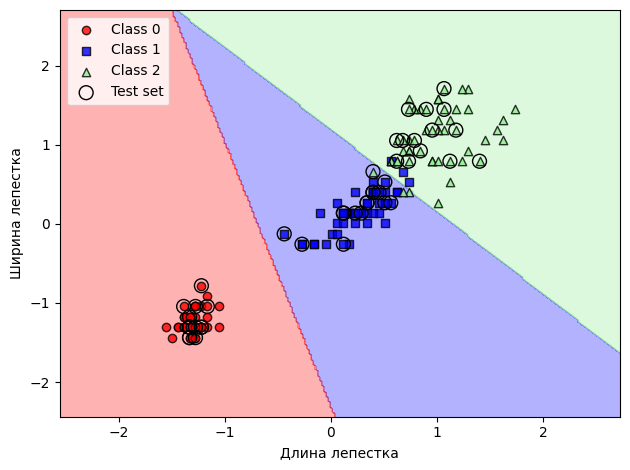

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr') # solver можно подобрать по документации
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
lr.predict_proba(X_test_std[:3, :])
# спрогнозированные верятности (первая строка - вероятности принадлежности первого цветка к трем возможным классам)

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [10]:
lr.predict_proba(X_test_std[:3]).argmax(axis=1)

array([2, 0, 0])

In [11]:
lr.predict(X_test_std[:3]) # вектор меток класса для первых трех объектов выборки

array([2, 0, 0])

In [12]:
lr.predict(X_test_std[0, :].reshape(1, -1))
# если хотим предсказать класс для одного объекта выброки, нужно преобразовать
# срез одной строки в двумерный массив, используем reshape для добавления нового измерения

array([2])

# Борьба с переобучением путем регуляризации


---



Если модель страдает от переобучения, также говорят, что модель имеет **высокую дисперсию**, которая может быть вызвана наличием слишком большого количества параметров, - т.е. модель может страдать от **недообучения**, когда она недостаточно сложна, чтобы хорошо выявить закономерности в обучающих данных, и, следовательно, тоже обладает низкой обобщающей способностью на незнакомых данных.



---


Высокая **дисперсия** модели (variance) пропорциональна переобучению, высокая **систематическая ошибка** (bias) - недообучению.

В контексте моделей машинного обучения дисперсия отражает изменчивость прогноза модели при классификации конкретного экземпляра, если мы повторно обучим модель несколько раз, например на разных подмножествах обучающего набора данных. Можно сказать, что модель чувствительна у случайной составляющей обучающих данных. Нпротив, систематическая ошибка показывает, насколько далеки прогнозы от правильных значений в целом, если мы заново обучим модель на различающихся наборах данных. То есть систематическая ошибка - это мера, которая не связана со случайностью.



---

**Регуляризация** - причина, по которой важно масштабировать признаки. Чтобы регуляризация работала должным образом, нам нужно убедиться, что все наши признаки имеют сопоставимые числовые масштабы.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

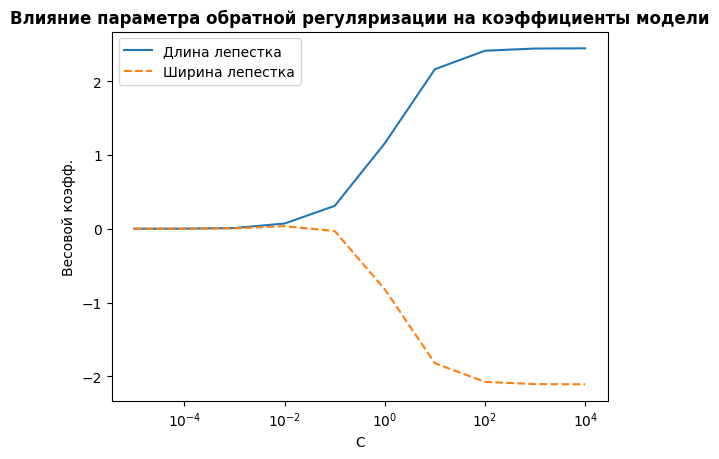

In [13]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label="Длина лепестка")
plt.plot(params, weights[:, 1], label="Ширина лепестка", linestyle='--')
plt.ylabel('Весовой коэфф.')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.title("Влияние параметра обратной регуляризации на коэффициенты модели", fontweight='bold')
plt.show()

# Классификация по наибольшему отступу с помощью метода опорных векторов


---



In [14]:
from sklearn.svm import SVC

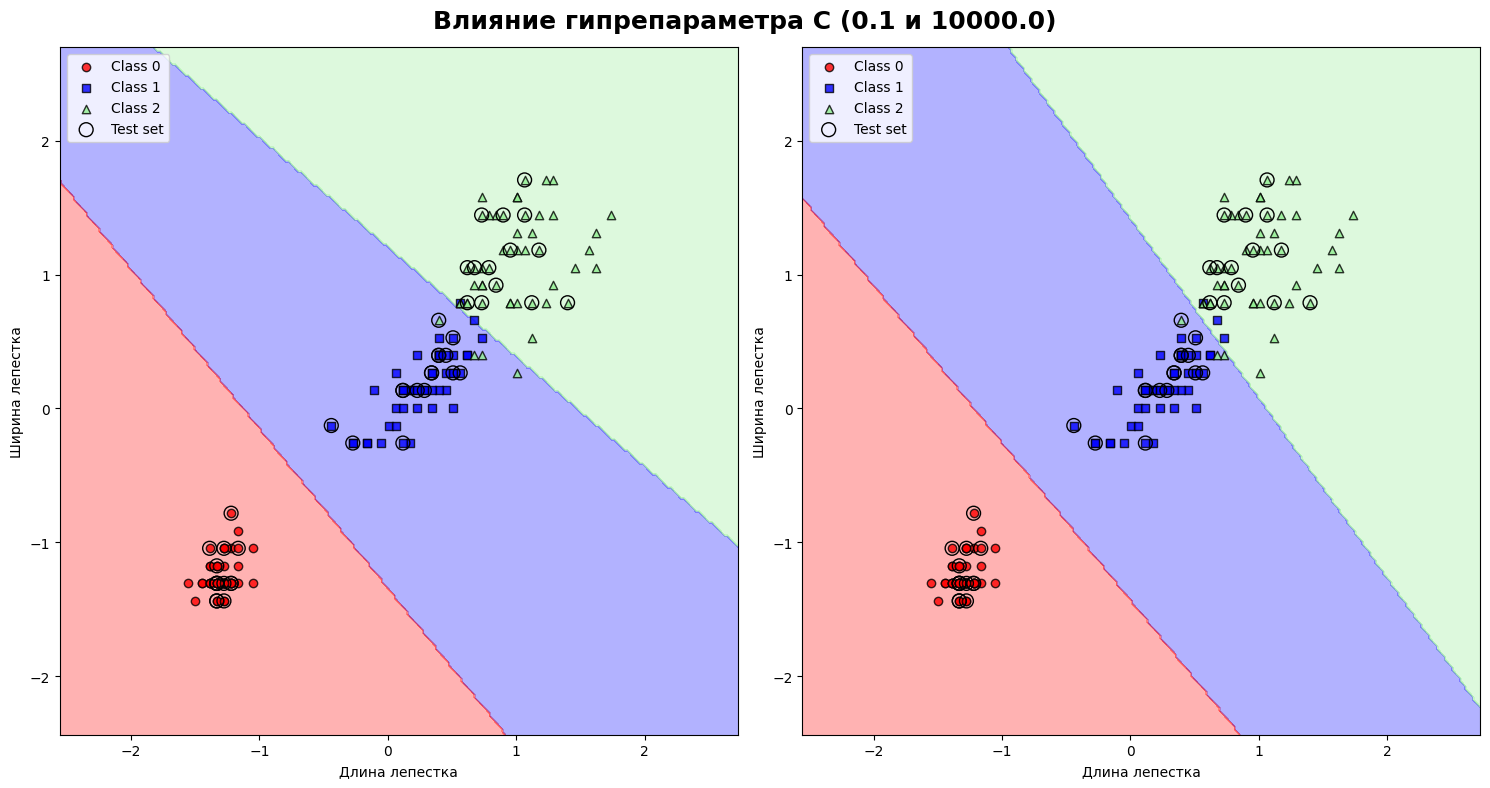

In [15]:
svm = SVC(kernel='linear', C=0.1, random_state=1)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(15, 8))
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

plt.subplot(gs[0])
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc='upper left')

svm = SVC(kernel='linear', C=10000.0, random_state=1)
svm.fit(X_train_std, y_train)

plt.subplot(gs[1])
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc='upper left')

plt.suptitle('Влияние гипрепараметра С (0.1 и 10000.0)', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

# Решение нелинейных задач с использованием ядерного варианта SVM


---



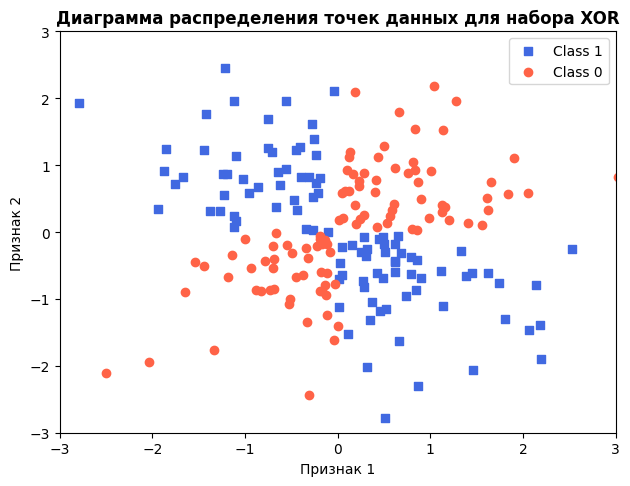

In [16]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='best')
plt.tight_layout()
plt.title(label="Диаграмма распределения точек данных для набора XOR", fontweight='bold')
plt.show()

Основная идея ядерных методов: создание нелинейных комбинаций исходных признаков для проецирования их в многомерное пространство с помощью функции отобраения, где данные становятся линейно разделимыми. Мы можем преобразовать двумерный набор данных в новое трехмерное пространство признаков, в котором классы становятся разделимыми посредством следующей проекции:

$$ φ(x1, x2) = (z1, z2, z3) = (x1, x2, x1^2 + x2^2) $$

Это позволяет нам разделить видимые на графике два класса с помощью линейной гиперплоскости, которая становится нелинейной решающей границей, если мы спроецируем ее обратно на исходное пространство признаков.

Одним из наиболее широко используемых ядер является ядро радиально базисной функции (RBF), которое можно просто назвать гауссовым ядром.

$$ k(x^i, x^j) = exp(-y||x^i - x^j||^2) $$

где $$ y = \frac{1}{2σ^2} $$ свободный параметр для оптимизации


Знак "минус" инвертирует меру расстояния, превращая ее в оценку сходства, и, благодаря экспоненциальному члену, результирующая оценка сходства будет находиться в диапазоне от 1 (для точно совпадающих экземпляров) до 0 (для очень непохожих экземпляров).

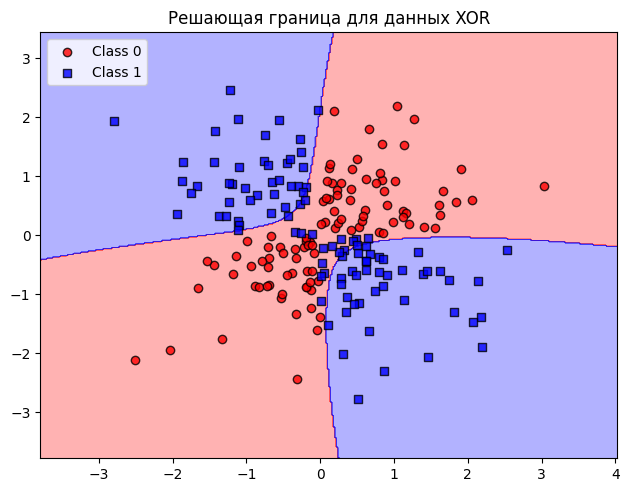

In [17]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title(label='Решающая граница для данных XOR')
plt.show()

Параметр y, для которого мы установили значение gamma=0.1, можно понимать как параметр отсечки для гауссовой сферы. Выбрав слишком большое зачение gamma, мы увеличим влияние или охват обучающих примеров, что приведет к более жесткой и неровной разделяющей границе.

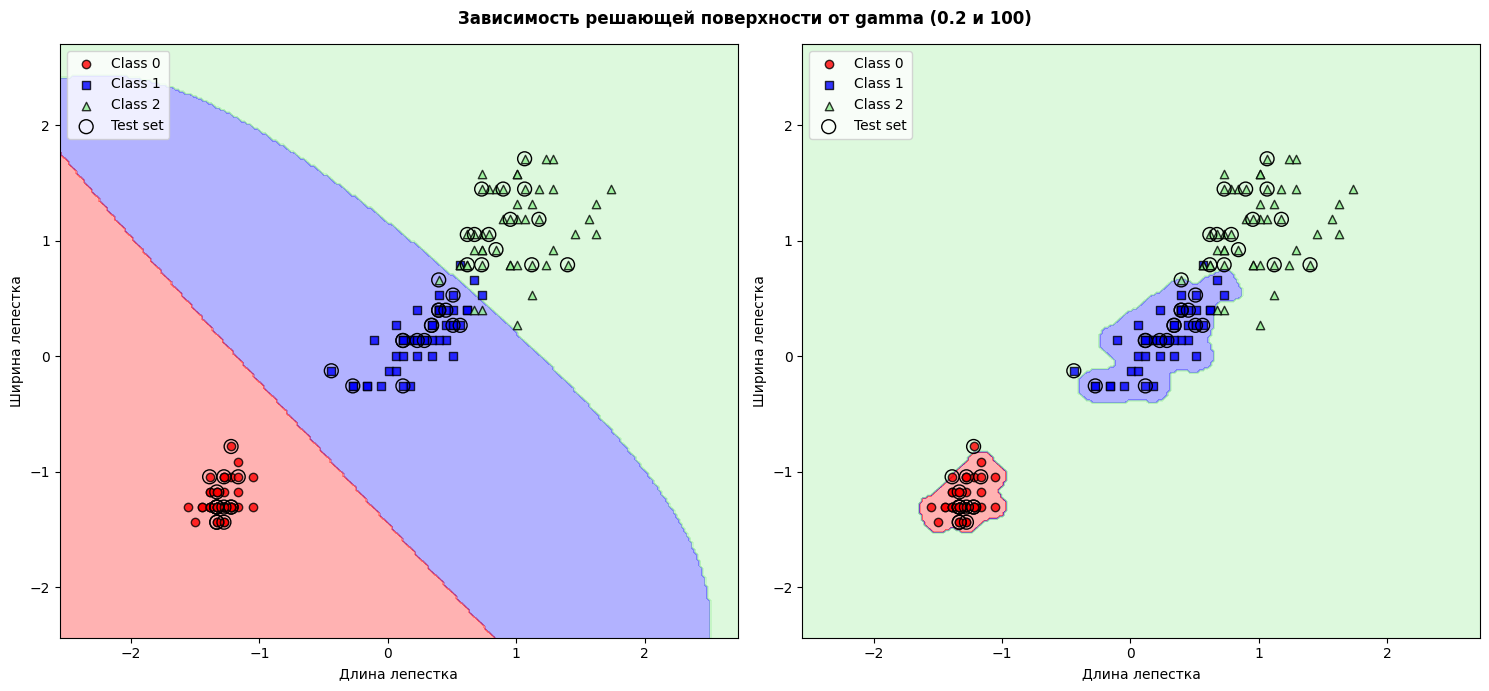

In [18]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(15, 7))
gs = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

plt.subplot(gs[0])
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc='upper left')
plt.tight_layout()


svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plt.subplot(gs[1])
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc='upper left')

plt.suptitle("Зависимость решающей поверхности от gamma (0.2 и 100)", fontweight='bold')
plt.tight_layout()
plt.show()

# Обучение дерева решений


---



Необходимо, чтобы каждое разделение данных по предикатам давало максимальный прирост информации, который мы определяем слндующим образом:

$$ IG(Dp, f) = I(Dp) - \sum{\frac{Nj}{Np}}×I(Dj) $$

Здесь f - функция для выполнения разделения, Dp и Dj - наборы родительского и Dj дочернего узлов, I - мера примеси (imputity), Np - общее кол-во обучающих примеров на родительском узле, Nj - кол-во примеров в j-м дочернем узле.

Каждый родительский узел (как провило) разделяется строго на два дочерних узла:

$$ IG(Dp, f) = I(Dp) - \frac{N_l}{Np}×I(D_l) - \frac{N_r}{Np}×I(D_r)$$

В бинарных деревья решений в качестве мер примесей используются:


1.   Критерий Джини
2.   Энтропия
3.   Ошибка классификации (IE)

**Определение энтропии:**

$$ I_H(t) = - \sum{p(i|t) × log_2p(i|t)} $$

Где *p(t|t)* - доля экземпляров, принадлежащих классу i для конкретного узла t. Таким образом, энтропия равна 0, если все примеры в узле принадлежат к одному и томуже классу. При *p(t|t)* = 1 логарифм занулится и энтропия будет нулевая.

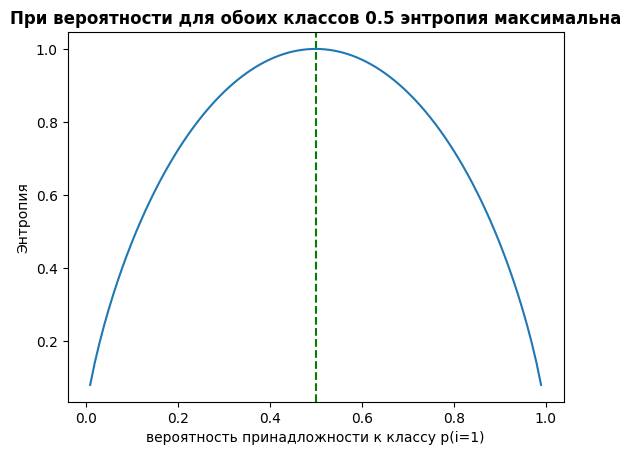

In [19]:
def entropy(p):
  return -p * np.log2(p)  - (1 - p) * np.log2((1-p))

X = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in X]
plt.ylabel("Энтропия")
plt.xlabel("вероятность принадложности к классу p(i=1)")
plt.axvline(x=0.5, color='green', linestyle='--')
plt.plot(X, ent)
plt.title(label="При вероятности для обоих классов 0.5 энтропия максимальна", fontweight='bold')
plt.show()

**Критерий Джини:**

$$ I_G(t) = \sum{p(i|t)(1-p(i|t))} = 1 - \sum{p(i|t)^2} $$

*практически не отличается от энтропии

**Ошибка классификации:**

$$ I_ε(t) = 1 - max({p(i|t)}) $$

Это полезный критерий для обрезки дерева, но его не рекомендуется применять при построении в качестве критерия разбиения, так как он менее чувствителен к изменения вероятностей классов узлов.

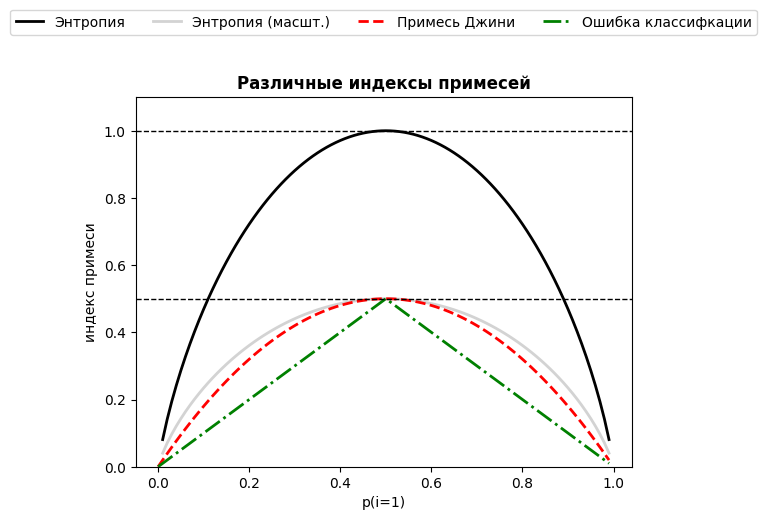

In [20]:
def gini(p):
  return 1 - (p**2 + (1 - p)**2)

def entropy(p):
  return -p * np.log2(p)  - (1 - p) * np.log2((1-p))

def error(p):
  return 1 - np.max([p, 1 - p])

X = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in X]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in X]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(X), err],
                          ['Энтропия', 'Энтропия (масшт.)',
                          'Примесь Джини',
                          'Ошибка классифкации'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgrey', 'red',
                           'green', 'cyan']):
  line = ax.plot(X, i, label=lab, linestyle=ls, lw=2, color=c)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('индекс примеси')
plt.title(label='Различные индексы примесей', fontweight='bold')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
plt.show()

# Построение дерева решений


---



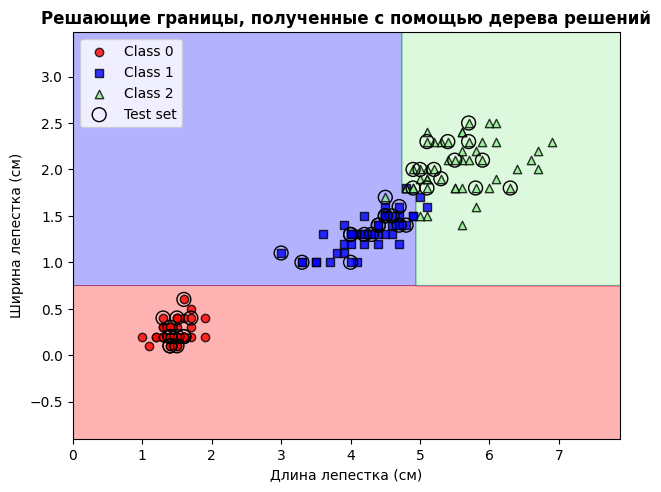

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title(label='Решающие границы, полученные с помощью дерева решений', fontweight='bold')
plt.show()

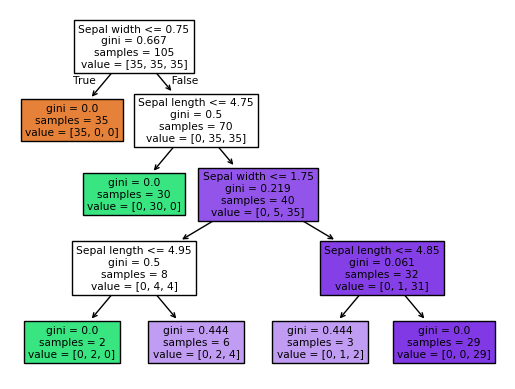

In [24]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

# Объединение нескольких деревьев решений с помощью случайных лесов


---



**Алгоритм случайного леса:**



1.   Извлекаем случайную *boostrap sample* размером *n* (случайным образом выбираем *n* экземпляров из обучающего набора данных с возвращением).
2.   Вырастить дерево решений из бустрэп-выборки. В каждом узле:


  *   случайно выбираем d признаков без возвращения;
  *   разделяем узел, используя признак, который обеспечивает наилучшее разделение в соответствии с целевой функцией, - например, максимизируя прирост информации.

3. Повторим шаги 1 и 2 k раз.
4. Агрегируем прогноз по каждому дереву, чтобы присвоить метку класса большинством голосов (majority vote).





Уменьшение размера бутстрэп-выборки увеличивает разнообразие отдельных деревьев,
поскольку вероятность того, что конкретный обучающий пример будет включен в бутстрэп-выборку, снижается. Следовательно, уменьшение размера бутстрэп-выборок может увеличить случайность леса и уменьшить эффект переобучения. Однако уменьшение бутстрэп-выборок обычно приводит к снижению общей производительности случайного леса и небольшому разрыву между производительностью обучения и
тестирования, а в целом - к низкой производительности тестирования. И наоборот,
увеличение размера выборки может увеличить риск переобучения. Поскольку бутстрэп-выборки и, следовательно, отдельные деревья решений становятся более похожими друг на друга, они обучаются более точно соответствовать исходному набору обучающих данных.


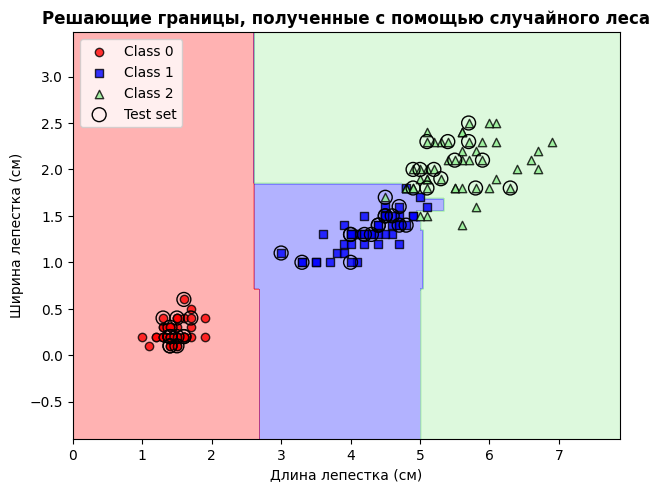

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
# n_jobs - паралелльное обучение на двух ядрах компьютера

forest.fit(X_train, y_train)
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=forest,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title(label='Решающие границы, полученные с помощью случайного леса',
          fontweight='bold')
plt.show()